# Data Analysis made easy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Reading data using read_html

#### read_html will be handy when you want to extract the table data from html page. read_html will result a list containing one dataframe for each table in the html page

In [7]:
auto_sales_url = "http://www.siamindia.com/statistics.aspx?mpgid=8&pgidtrail=14"
table_list = pd.read_html(auto_sales_url,header=0)
auto_sales_df = table_list[0]

In [8]:
len(table_list)

1

In [9]:
auto_sales_df.head()

,Category,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15
0,Passenger Vehicles,1951333,2501542,2629839,2665015,2503509,2601111
1,Commercial Vehicles,532721,684905,809499,793211,632851,614961
2,Three Wheelers,440392,526024,513281,538290,480085,531927
3,Two Wheelers,9370951,11768910,13409150,13797185,14806778,16004581
4,Grand Total,12295397,15481381,17361769,17793701,18423223,19752580


In [10]:
auto_sales_df = auto_sales_df.set_index("Category")

In [11]:
auto_sales_df.head()

,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15
Category,,,,,,
Passenger Vehicles,1951333,2501542,2629839,2665015,2503509,2601111
Commercial Vehicles,532721,684905,809499,793211,632851,614961
Three Wheelers,440392,526024,513281,538290,480085,531927
Two Wheelers,9370951,11768910,13409150,13797185,14806778,16004581
Grand Total,12295397,15481381,17361769,17793701,18423223,19752580


In [12]:
# finding the shape of the data frame ( rows,  columns)
auto_sales_df.shape

(5, 6)

In [13]:
# extractig the column data
auto_sales_df["2009-10"]

Category
Passenger Vehicles      1951333
Commercial Vehicles      532721
Three Wheelers           440392
Two Wheelers            9370951
Grand Total            12295397
Name: 2009-10, dtype: int64

In [14]:
auto_sales_df.head()

,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15
Category,,,,,,
Passenger Vehicles,1951333,2501542,2629839,2665015,2503509,2601111
Commercial Vehicles,532721,684905,809499,793211,632851,614961
Three Wheelers,440392,526024,513281,538290,480085,531927
Two Wheelers,9370951,11768910,13409150,13797185,14806778,16004581
Grand Total,12295397,15481381,17361769,17793701,18423223,19752580


In [15]:
auto_sales_df.index

Index([u'Passenger Vehicles', u'Commercial Vehicles', u'Three Wheelers',
       u'Two Wheelers', u'Grand Total'],
      dtype='object', name=u'Category')

In [16]:
auto_sales_df.columns

Index([u'2009-10', u'2010-11', u'2011-12', u'2012-13', u'2013-14', u'2014-15'], dtype='object')

In [17]:
# extracting the row data
auto_sales_df.loc["Passenger Vehicles"]

2009-10    1951333
2010-11    2501542
2011-12    2629839
2012-13    2665015
2013-14    2503509
2014-15    2601111
Name: Passenger Vehicles, dtype: int64

In [18]:
auto_sales_df.dtypes

2009-10    int64
2010-11    int64
2011-12    int64
2012-13    int64
2013-14    int64
2014-15    int64
dtype: object

In [19]:
auto_sales_df = auto_sales_df.drop("Grand Total", axis=0)
auto_sales_df.head()

,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15
Category,,,,,,
Passenger Vehicles,1951333,2501542,2629839,2665015,2503509,2601111
Commercial Vehicles,532721,684905,809499,793211,632851,614961
Three Wheelers,440392,526024,513281,538290,480085,531927
Two Wheelers,9370951,11768910,13409150,13797185,14806778,16004581


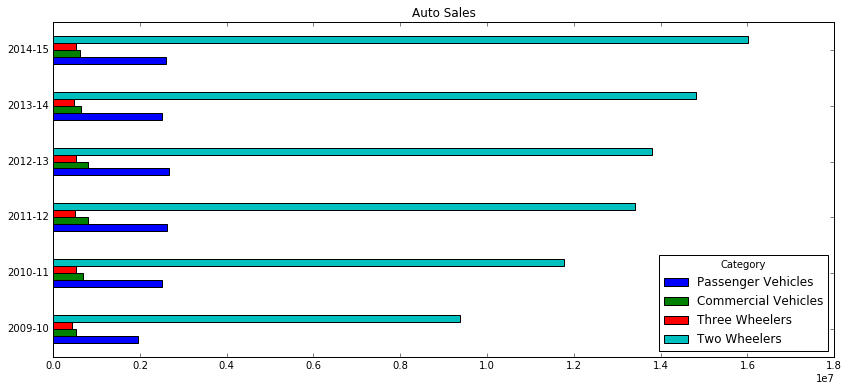

In [20]:
auto_sales_graph = auto_sales_df.T.plot(kind='barh',figsize=(14,6),title="Auto Sales")

In [21]:
# html page containing multiple tables in the same html
funds_url = 'https://www.valueresearchonline.com/funds/newsnapshot.asp?schemecode=3019'

In [25]:
df_list = pd.read_html(funds_url)

In [26]:
len(df_list)

13

In [27]:
df_list[0].head()

,0,1
0,Category:,Equity: Small Cap
1,Assets:,"R 2,740 crore (As on Dec 31, 2015)"
2,Expense:,"2.40% (As on Sep 30, 2015)"


In [29]:
# Extracting one of the multiple tables by matching to a string
#filtered_df_list = pd.read_html(funds_url,match='Rank within Category')
filtered_df_list = pd.read_html(funds_url,match='Rank within Category',header=0,index_col=0)
#skiprows

In [30]:
len(filtered_df_list)

1

In [31]:
filtered_df_list[0].head()

,YTD,1-Month,3-Month,1-Year,3-Year,5-Year,10-Year
Fund,-7.40,-4.14,-6.24,-1.10,28.90,21.13,-
Nifty Midcap 100,-6.84,-3.56,-5.92,-2.44,12.85,8.72,-
Category,-8.19,-4.49,-5.63,-1.22,23.97,15.80,-
Rank within Category,9.00,17.00,22.00,18.00,8.00,2.00,-
Number of funds in category,41.00,41.00,41.00,41.00,37.00,18.00,-


In [33]:
# Copying the data frame explictly into another dataframe
# selecting only the required columns
df = filtered_df_list[0].iloc[:,[0,1,2,4,5]].copy()
df.head()

,YTD,1-Month,3-Month,3-Year,5-Year
Fund,-7.40,-4.14,-6.24,28.90,21.13
Nifty Midcap 100,-6.84,-3.56,-5.92,12.85,8.72
Category,-8.19,-4.49,-5.63,23.97,15.80
Rank within Category,9.00,17.00,22.00,8.00,2.00
Number of funds in category,41.00,41.00,41.00,37.00,18.00


In [34]:
df.dtypes

YTD        float64
1-Month    float64
3-Month    float64
3-Year     float64
5-Year     float64
dtype: object

In [35]:
# Converting column data types
for column in df.columns:    
    df[column] = df[column].astype(np.float16)

In [36]:
df.dtypes

YTD        float16
1-Month    float16
3-Month    float16
3-Year     float16
5-Year     float16
dtype: object

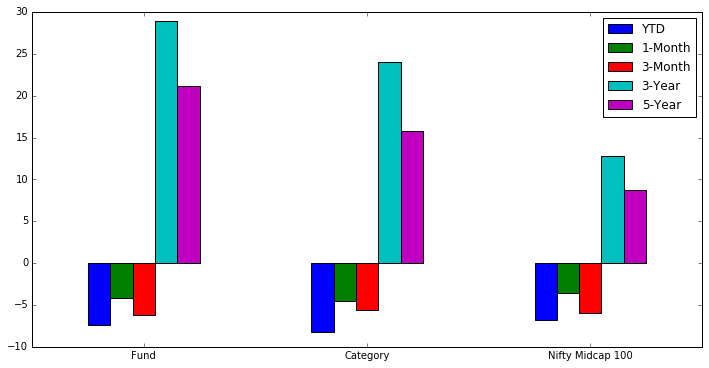

In [37]:
df.loc[["Fund","Category","Nifty Midcap 100"]].plot(figsize=(12,6),kind='bar',rot=0)
#df.loc[["Fund","Category","Nifty Midcap 100"]].T.plot(figsize=(12,6),kind='bar',rot=0)

In [39]:
# using attrs in read_html for filtering the data
df_attr_list = pd.read_html(funds_url,
                            attrs={"id":"fund-snapshot-peer-comparison-table"},
                            header=0,index_col=0)

In [40]:
df_attr_list[0].head()

,Rating,Launch,1-Year Ret,3-Year Ret,5-Year Ret,ExpenseRatio (%),Assets (Cr)
Fund,,,,,,,
Franklin India Smaller Companies Fund,NaN,Jan-2006,-1.10,28.90,21.13,2.40,2740
Canara Robeco Emerging Equities Fund - Regular Plan,NaN,Mar-2005,0.24,27.19,20.28,2.93,911
DSP BlackRock Micro Cap Fund - Regular Plan,NaN,Jun-2007,8.73,32.02,20.91,2.43,2413
Reliance Small Cap Fund,NaN,Sep-2010,-0.48,32.45,20.84,2.44,2017
SBI Magnum Midcap Fund,NaN,Mar-2005,5.09,27.23,19.55,2.55,1471


In [41]:
df = df_attr_list[0].dropna(axis=1).copy()
df.head()

,Launch,1-Year Ret,3-Year Ret,5-Year Ret,ExpenseRatio (%),Assets (Cr)
Fund,,,,,,
Franklin India Smaller Companies Fund,Jan-2006,-1.10,28.90,21.13,2.40,2740
Canara Robeco Emerging Equities Fund - Regular Plan,Mar-2005,0.24,27.19,20.28,2.93,911
DSP BlackRock Micro Cap Fund - Regular Plan,Jun-2007,8.73,32.02,20.91,2.43,2413
Reliance Small Cap Fund,Sep-2010,-0.48,32.45,20.84,2.44,2017
SBI Magnum Midcap Fund,Mar-2005,5.09,27.23,19.55,2.55,1471


In [42]:
df["Assets (Cr)"] = df["Assets (Cr)"].astype(np.int32)

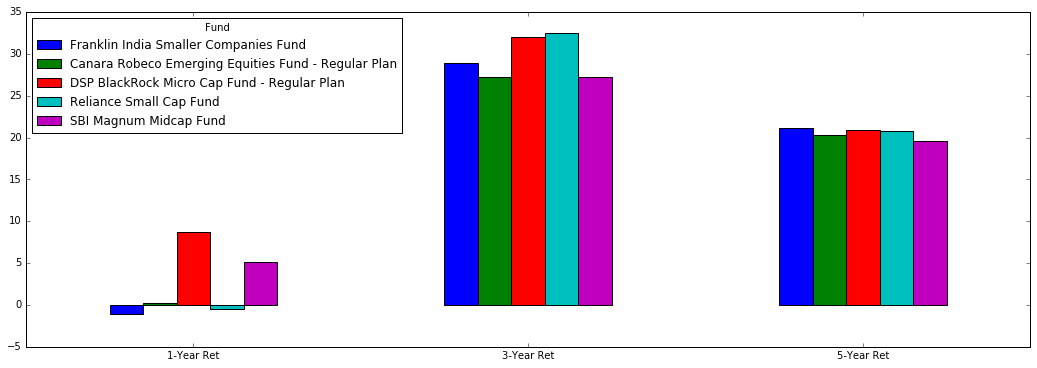

In [43]:
df[["1-Year Ret","3-Year Ret","5-Year Ret"]].T.plot(figsize=(18,6),kind='bar',rot=0)

In [44]:
url = 'http://www.fdic.gov/bank/individual/failed/banklist.html'
#bank_df_list = pd.read_html(url)
bank_df_list = pd.read_html(url,parse_dates=[5,6,9])
bank_df = bank_df_list[0]

In [45]:
bank_df.head(2)

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,Loss Share Type,Agreement Terminated,Termination Date
0,Hometown National Bank,Longview,WA,35156,Twin City Bank,2015-10-02,2016-01-07,NaN,NaN,NaN
1,The Bank of Georgia,Peachtree City,GA,35259,Fidelity Bank,2015-10-02,2016-01-07,NaN,NaN,NaN


In [46]:
# let us see if there are records with same Bank Name
bank_df_name_duplicates = bank_df[bank_df["Bank Name"].duplicated()]

In [47]:
# Check the data types for date columns
bank_df.dtypes

Bank Name                        object
City                             object
ST                               object
CERT                              int64
Acquiring Institution            object
Closing Date             datetime64[ns]
Updated Date             datetime64[ns]
Loss Share Type                  object
Agreement Terminated             object
Termination Date                 object
dtype: object

In [49]:
# filtering for duplicated record and sorting by Bank Name
bank_df[bank_df["Bank Name"].isin(bank_df_name_duplicates["Bank Name"])].sort_values(by="Bank Name").head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,Loss Share Type,Agreement Terminated,Termination Date
377,Citizens National Bank,Teague,TX,25222,U.S. Bank N.A.,2009-10-30,2012-08-22,SFR/NSF,NaN,NaN
454,Citizens National Bank,Macomb,IL,5757,Morton Community Bank,2009-05-22,2012-09-04,SFR/NSF,Both,"July 1, 2011"
265,First National Bank,Savannah,GA,34152,"The Savannah Bank, N.A.",2010-06-25,2014-03-21,none,NaN,NaN
271,First National Bank,Rosedale,MS,15814,The Jefferson Bank,2010-06-04,2014-03-21,SFR/NSF,Both,"November 19, 2010"
420,First State Bank,Sarasota,FL,27364,"Stearns Bank, N.A.",2009-08-07,2012-08-20,SFR/NSF,NaN,NaN


In [50]:
# It looks like the Bank Name and City makes the unique combination
# Let's check if there are any duplicates with this combination
bank_df[bank_df[["Bank Name","City"]].duplicated()]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,Loss Share Type,Agreement Terminated,Termination Date


In [51]:
print bank_df["Closing Date"].min()
print bank_df["Closing Date"].max()

2000-10-13 00:00:00
2015-10-02 00:00:00


In [52]:
bank_df["Closing Date"].map(lambda x: x.year).head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: Closing Date, dtype: int64

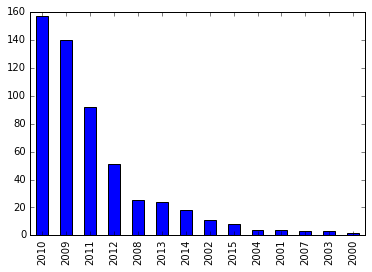

In [53]:
# Let us find the number of banks closed in each year using map
bank_df["Closing Date"].map(lambda x: x.year).value_counts().plot(kind='bar')

In [54]:
# Let us find the number of banks closed in each year using groupby
bank_df_group = bank_df.groupby([bank_df["Closing Date"].map(lambda x: x.year)])
type(bank_df_group)

pandas.core.groupby.DataFrameGroupBy

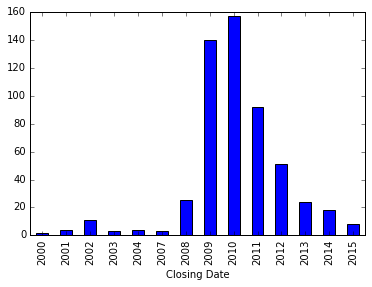

In [55]:
# plot the number of banks closed by each year
bank_df_group.count()["Bank Name"].plot(kind='bar')

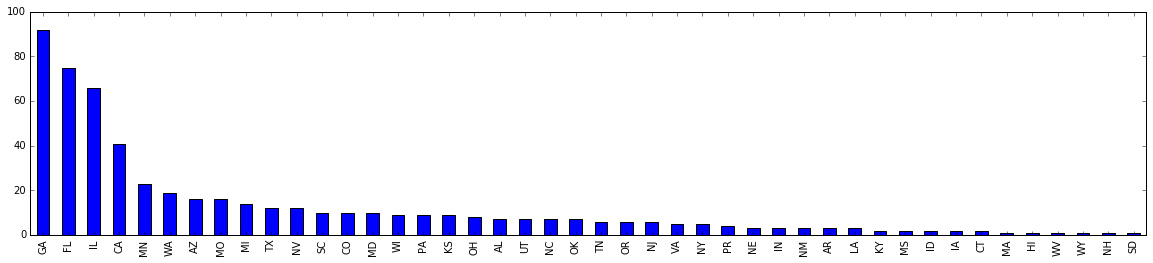

In [56]:
# Number of banks closed by each state between 2000 and 2015
bank_df["ST"].value_counts().plot(kind='bar',figsize=(20,4))

In [57]:
# get the state names from another url
states_df = pd.read_html("http://www.infoplease.com/ipa/A0110468.html", attrs={"id":"A0110469"},header=0)[0]

In [58]:
states_df.columns

Index([u'State', u'Abbreviation', u'Postal Code'], dtype='object')

In [59]:
# check the dataframe for GA state
states_df[states_df["Postal Code"]=="GA"]

,State,Abbreviation,Postal Code
11,Georgia,Ga.,GA


In [60]:
# Join the state names to bank_df dataframe using merge
bank_df_state_names= pd.merge(bank_df,states_df,
                              how="left",
                              left_on="ST",
                              right_on="Postal Code",
                              sort=False)

In [61]:
bank_df_state_names.head(2)

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,Loss Share Type,Agreement Terminated,Termination Date,State,Abbreviation,Postal Code
0,Hometown National Bank,Longview,WA,35156,Twin City Bank,2015-10-02,2016-01-07,NaN,NaN,NaN,Washington,Wash.,WA
1,The Bank of Georgia,Peachtree City,GA,35259,Fidelity Bank,2015-10-02,2016-01-07,NaN,NaN,NaN,Georgia,Ga.,GA


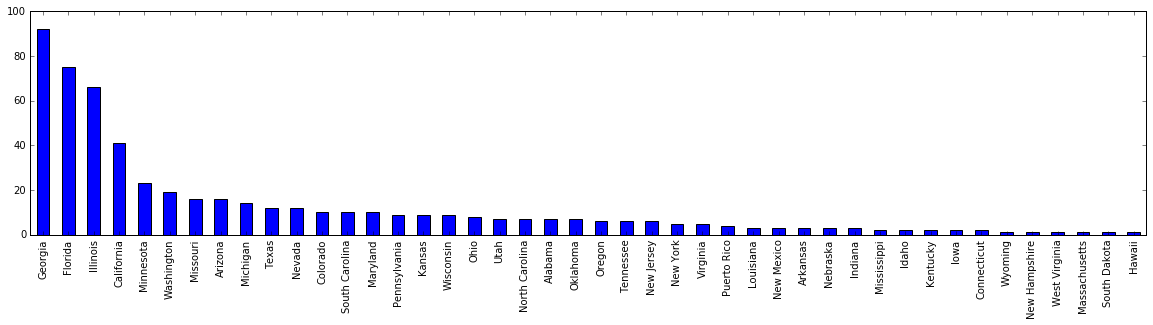

In [62]:
# number of banks closed by state name
bank_df_state_names["State"].value_counts().plot(kind='bar',figsize=(20,4))

### Reading data using read_clipboard

#### somtimes if you want to bring data copied in clip board into pandas dataframe, you can use read_clipboard

In [63]:
#parse_dates=[3]
#top10_funds_df = pd.read_clipboard()
top10_funds_df = pd.read_clipboard(parse_dates=[3])
top10_funds_df.head()
#You may need to install xclip or xsel (with gtk or PyQt4 modules) on Linux to use these methods.

,Fund,Rating,Category,Launch,Expense,1-Year(Return),1-Year(Rank),Net Assets(Cr)
0,Birla Sun Life MNC Fund,Unrated,EQ-OTH,1994-04-01,2.43,26.11,0,2704
1,SBI Pharma Fund,Unrated,EQ-PH,1999-07-01,2.68,20.74,2/6,862
2,Escorts High Yield Equity Fund,Unrated,EQ-SC,2006-12-01,2.50,19.58,5/41,3
3,Motilal Oswal MOSt Focused Multicap 35 Fund - ...,Unrated,EQ-MLC,2014-04-01,2.35,19.40,2/187,2914
4,Motilal Oswal MOSt Focused Midcap 30 Fund - Re...,Unrated,EQ-MC,2014-02-01,2.63,19.28,2/78,816


In [64]:
top10_funds_df.dtypes

Fund                      object
Rating                    object
Category                  object
Launch            datetime64[ns]
Expense                  float64
1-Year(Return)           float64
1-Year(Rank)              object
Net Assets(Cr)             int64
dtype: object

In [65]:
column_names = ['Table Name','State Code','District Code','Area Name','Age',
                    'Persons-Total','Males-Total','Females-Total',
                    'Persons-Rural','Males-Rural','Females-Rural',
                    'Persons-Urban','Males-Urban','Females-Urban']
excel_df = pd.read_excel("DDW-0000C-13.xls",skiprows=6, names = column_names)
#excel_df.columns = column_names

In [66]:
excel_df.head()

,Table Name,State Code,District Code,Area Name,Age,Persons-Total,Males-Total,Females-Total,Persons-Rural,Males-Rural,Females-Rural,Persons-Urban,Males-Urban,Females-Urban
0,C1300,0,0,India,All ages,1210854977,623270258,587584719,833748852,427781058,405967794,377106125,195489200,181616925
1,C1300,0,0,India,0,20311234,10633298,9677936,14884690,7784009,7100681,5426544,2849289,2577255
2,C1300,0,0,India,1,21755197,11381468,10373729,15731709,8216086,7515623,6023488,3165382,2858106
3,C1300,0,0,India,2,23056268,11952853,11103415,17065758,8827253,8238505,5990510,3125600,2864910
4,C1300,0,0,India,3,23974041,12331431,11642610,17778869,9116778,8662091,6195172,3214653,2980519


In [67]:
# Filtering data for karnata state
req_columns = ["Age","Males-Rural","Females-Rural","Males-Urban","Females-Urban"]
kar_filter = (excel_df["Area Name"] == "State - KARNATAKA (29)") & (excel_df["Age"] != "All ages") & (excel_df["Age"] != "Age not stated")
excel_kar_df = excel_df[kar_filter][req_columns].copy()

In [68]:
excel_kar_df.head(2)

,Age,Males-Rural,Females-Rural,Males-Urban,Females-Urban
2988,0,300346,285184,178000,170115
2989,1,314001,296926,208961,197786


In [69]:
excel_kar_df.dtypes

Age              object
Males-Rural       int64
Females-Rural     int64
Males-Urban       int64
Females-Urban     int64
dtype: object

In [71]:
# find unique values in Age Column
excel_kar_df.Age.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, u'100+'], dtype=object)

In [72]:
# Converting Age to integer data type
excel_kar_df.Age = excel_kar_df.Age.apply(lambda x:int(str(x).replace('+','')))

In [73]:
excel_kar_df.dtypes

Age              int64
Males-Rural      int64
Females-Rural    int64
Males-Urban      int64
Females-Urban    int64
dtype: object

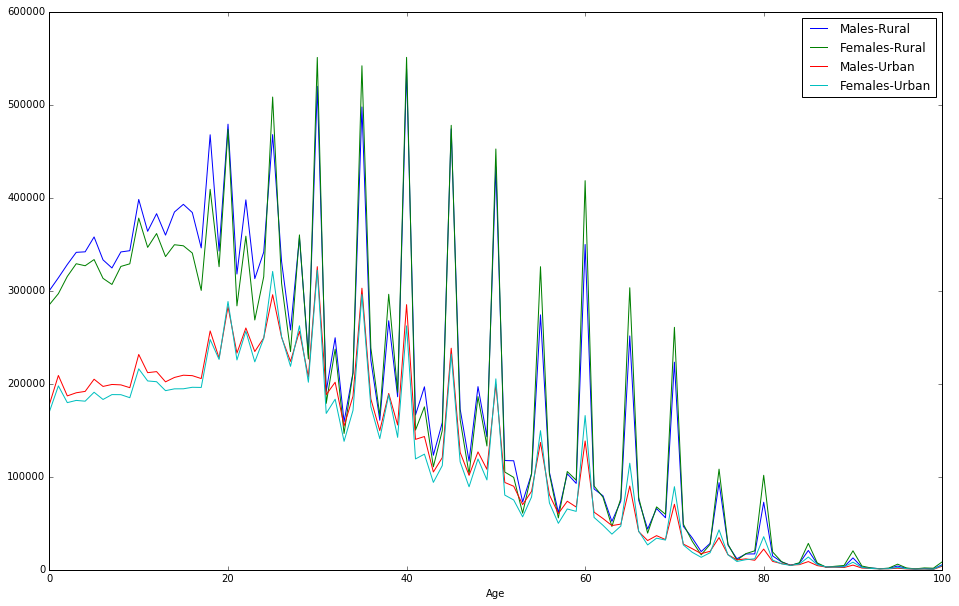

In [74]:
# let's plot the graph and observe
# save the graph to a file
kar_graph = excel_kar_df.set_index("Age").plot(figsize=(16,10))
#kar_graph  = excel_kar_df.set_index("Age").plot(figsize=(16,10),subplots=True)
#kar_graph = excel_kar_df.set_index("Age").plot(figsize=(16,10),subplots=True,ylim=(0,600000))
plt.savefig("kar_graph.jpeg")

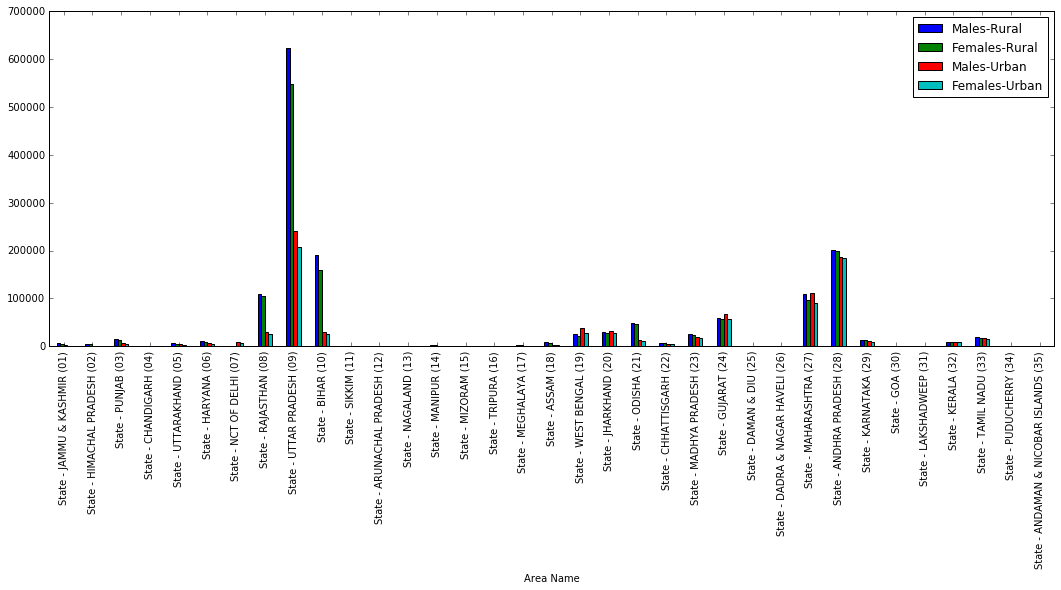

In [75]:
# let us observe the Age not stated by state
age_filter = (excel_df["Age"] == "Age not stated") & (excel_df["Area Name"] != "India")
required_columns = ["Area Name","Males-Rural","Females-Rural","Males-Urban","Females-Urban"]
excel_df_age_ns = excel_df[age_filter][required_columns]
excel_df_age_ns = excel_df_age_ns.set_index("Area Name")
age_graph = excel_df_age_ns.plot(kind='bar',figsize=(18,6))

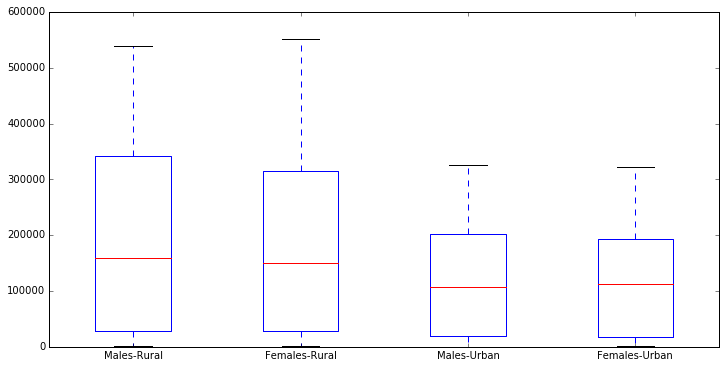

In [76]:
# let us look at the distribution
kar_age_graph = excel_kar_df.set_index("Age").plot(figsize=(12,6),kind='box')

In [77]:
# describe gives a stats summary of all of the numeric fields
excel_kar_df.describe()

,Age,Males-Rural,Females-Rural,Males-Urban,Females-Urban
count,101.000000,101.000000,101.000000,101.000000,101.000000
mean,50.000000,187281.198020,183446.584158,119067.782178,114654.396040
std,29.300171,159639.437129,157538.589132,95992.992138,93656.789443
min,0.000000,881.000000,1009.000000,406.000000,627.000000
25%,25.000000,28453.000000,28402.000000,19886.000000,18380.000000
50%,50.000000,159167.000000,149798.000000,108020.000000,112043.000000
75%,75.000000,341347.000000,315453.000000,202113.000000,192617.000000
max,100.000000,538633.000000,551024.000000,325945.000000,322299.000000


### Reading data using read_csv

#### One of the very commonly used method is read_csv

In [78]:
# district wise rail fall data from 1951 to 2000
data = pd.read_csv("distirct_railfaill_1951_2000.csv")

In [79]:
data.head(2)

,STATE/UT,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN+FEB,MAM,JJAS,OND
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3


In [80]:
# copy the Karnataka rain fall data into a separate dataframe
data_kar = data[data["STATE/UT"]=="KARNATAKA"].copy()

In [81]:
# drop STATE_UT column and set DISTRICT as the index
data_kar = data_kar.drop("STATE/UT", axis=1)
data_kar = data_kar.set_index("DISTRICT")

In [82]:
# Keep only required columns which are monts from JAN to DEC
data_kar = data_kar[[u'JAN', u'FEB', u'MAR', u'APR', u'MAY', u'JUN', u'JUL', u'AUG', u'SEP',
       u'OCT', u'NOV', u'DEC']]

In [83]:
data_kar.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
DISTRICT,,,,,,,,,,,,
UTTAR KANNADA,0.3,0.1,2.7,22.1,114.0,740.9,1053.8,667.7,258.5,155.1,44.1,11.2
DAKSHIN KANDA,1.9,0.7,6.4,39.8,180.9,977.2,1227.2,833.6,313.6,236.9,82.0,15.6
UDUPI,1.4,0.4,4.1,29.4,193.8,1081.0,1371.6,902.2,404.9,223.8,74.6,18.8
BELGAM,0.7,0.9,6.2,30.2,74.8,130.4,204.0,126.7,113.0,116.6,30.6,5.1
BIDAR,5.9,6.1,10.1,21.7,31.4,137.1,190.7,196.6,170.5,93.5,20.9,6.2


In [84]:
data_kar.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.026667,2.696667,7.163333,36.773333,88.166667,204.880000,280.700000,209.256667,164.076667,143.356667,44.350000,11.170000
std,1.259429,1.960029,3.636072,16.850723,40.632765,273.931535,374.960968,232.682348,64.369069,34.699406,16.686661,5.248458
min,0.300000,0.100000,2.500000,17.700000,31.400000,48.700000,49.300000,58.900000,99.500000,93.500000,20.800000,4.500000
25%,1.325000,0.925000,4.250000,24.075000,59.650000,72.250000,76.550000,87.525000,125.125000,116.450000,30.725000,7.000000
50%,1.750000,2.600000,6.350000,33.750000,78.400000,83.400000,97.650000,109.950000,148.000000,142.850000,44.750000,9.850000
75%,2.400000,4.050000,9.625000,44.875000,106.200000,129.050000,200.525000,166.000000,178.650000,157.550000,54.075000,14.750000
max,5.900000,6.700000,18.500000,89.800000,193.800000,1081.000000,1371.600000,902.200000,404.900000,236.900000,82.000000,24.300000


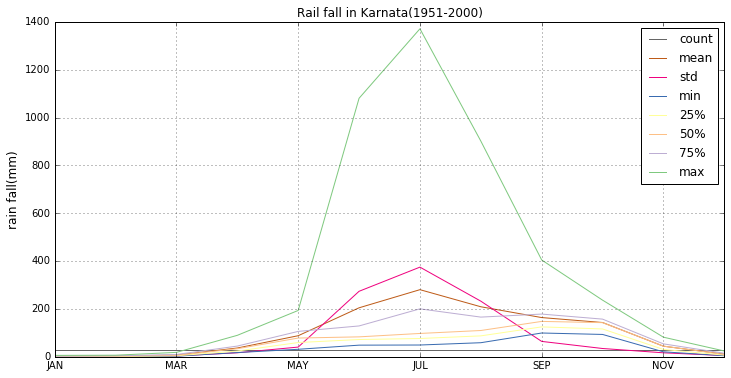

In [85]:
# Let us create the axes plot obect and use set_ylable and set_title methods
#data_kar.plot?
ax = data_kar.describe().T.plot(colormap=plt.cm.Accent_r ,figsize=(12,6),grid=True)
ax.set_ylabel("rain fall(mm)",fontdict={'size':12})
ax.set_title("Rail fall in Karnata(1951-2000)",fontdict={'size':12})

### Using default values while reading csv file

In [86]:
# let us look at a bit complicated csv file and see how we can use all of the options
# available with read_csv method
!head -10 GLB.Ts+dSST.txt

        GLOBAL Land-Ocean Temperature Index in 0.01 degrees Celsius   base period: 1951-1980

                    sources:  GHCN-v3 1880-04/2015 + SST: ERSST 1880-04/2015
                    using elimination of outliers and homogeneity adjustment
                    Notes: 1950 DJF = Dec 1949 - Feb 1950 ;  ***** = missing

                                                                     AnnMean
Year   Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec    J-D D-N    DJF  MAM  JJA  SON  Year
1880   -34  -27  -22  -30  -16  -24  -19  -12  -20  -19  -16  -21    -22 ***   ****  -23  -18  -18  1880
1881   -13  -16   -2   -3   -3  -27  -12   -8  -18  -23  -28  -18    -14 -14    -17   -3  -15  -23  1881


In [87]:
#pd.read_csv?
required_columns = ["Year","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
glb_temp_df = pd.read_csv("GLB.Ts+dSST.txt",skiprows=7,usecols=required_columns,
                      skip_footer=12,engine='python',sep="\s+",na_values=['****','***'],
                      index_col=0
                      )

In [88]:
glb_temp_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25


In [89]:
# there are headers in between the data sets. Let us remove these headers from the file
# please note that index can have duplicates
glb_temp_df.loc["Year"]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec


In [90]:
glb_temp_df = glb_temp_df[glb_temp_df["Jan"] != "Jan"]
glb_temp_df.shape

(136, 12)

In [91]:
glb_temp_df.index

Index([u'1880', u'1881', u'1882', u'1883', u'1884', u'1885', u'1886', u'1887',
       u'1888', u'1889',
       ...
       u'2006', u'2007', u'2008', u'2009', u'2010', u'2011', u'2012', u'2013',
       u'2014', u'2015'],
      dtype='object', name=u'Year', length=136)

In [92]:
glb_temp_df.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2011,45,44,57,60,47,54,70,69,52,60,50,48
2012,38,43,52,62,71,59,50,56,68,73,69,46
2013,62,52,60,48,56,61,53,61,73,61,75,61
2014,68,44,71,72,79,62,50,74,81,78,64,74
2015,75,80,84,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
glb_temp_df.dtypes

Jan    object
Feb    object
Mar    object
Apr    object
May    object
Jun    object
Jul    object
Aug    object
Sep    object
Oct    object
Nov    object
Dec    object
dtype: object

In [94]:
# let us convert the teamperatue columns to int
# let fill the NA values with forward fill
for col in glb_temp_df.columns:
    glb_temp_df[col] = glb_temp_df[col].ffill().astype(np.int64)

In [95]:
glb_temp_df.dtypes

Jan    int64
Feb    int64
Mar    int64
Apr    int64
May    int64
Jun    int64
Jul    int64
Aug    int64
Sep    int64
Oct    int64
Nov    int64
Dec    int64
dtype: object

In [96]:
glb_temp_df.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2011,45,44,57,60,47,54,70,69,52,60,50,48
2012,38,43,52,62,71,59,50,56,68,73,69,46
2013,62,52,60,48,56,61,53,61,73,61,75,61
2014,68,44,71,72,79,62,50,74,81,78,64,74
2015,75,80,84,71,79,62,50,74,81,78,64,74


In [97]:
# mean temp by year
glb_temp_df.mean(axis=1).head()

Year
1880   -21.666667
1881   -14.250000
1882   -17.250000
1883   -19.916667
1884   -27.750000
dtype: float64

In [98]:
# mean temp by month
glb_temp_df.mean(axis=0).head()

Jan   -1.411765
Feb   -0.161765
Mar    1.294118
Apr   -0.823529
May   -1.455882
dtype: float64

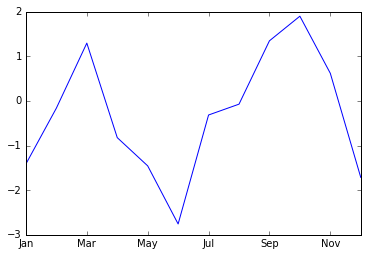

In [99]:
glb_temp_df.mean(axis=0).plot()

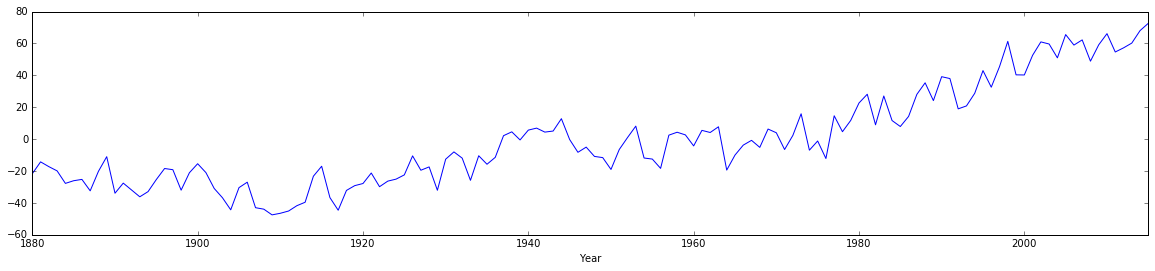

In [100]:
glb_temp_df.mean(axis=1).plot(figsize=(20,4))

### Exploring groupby functionality

In [101]:
# Let us take the rain fall data
data.head(2)

,STATE/UT,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN+FEB,MAM,JJAS,OND
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3


In [102]:
# first create the group by object
data_gb = data.groupby("STATE/UT")

In [103]:
type(data_gb)

pandas.core.groupby.DataFrameGroupBy

In [104]:
len(data_gb)

34

In [105]:
len(data["STATE/UT"].unique())

34

In [110]:
for name,group in data_gb:
    print(name)

ANDAMAN And NICOBAR ISLANDS
ANDHRA PRADESH
ARUNACHAL PRADESH
ASSAM
BIHAR
CHANDIGARH
CHATISGARH
DADAR NAGAR HAVELI
DAMAN AND DUI
DELHI
GOA
GUJARAT
HARYANA
HIMACHAL
JAMMU AND KASHMIR
JHARKHAND
KARNATAKA
KERALA
MADHYA PRADESH
MAHARASHTRA
MANIPUR
MEGHALAYA
MIZORAM
NAGALAND
ORISSA
PONDICHERRY
PUNJAB
RAJASTHAN
SIKKIM
TAMIL NADU
TRIPURA
UTTAR PRADESH
UTTARANCHAL
WEST BENGAL


In [111]:
#gettig one groups data
type(data_gb.get_group("KARNATAKA"))

pandas.core.frame.DataFrame

In [112]:
data_gb_mean = data_gb.mean()

In [113]:
type(data_gb_mean)

pandas.core.frame.DataFrame

In [114]:
data_gb_mean.head(2)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN+FEB,MAM,JJAS,OND
STATE/UT,,,,,,,,,,,,,,,,,
ANDAMAN And NICOBAR ISLANDS,61.233333,33.266667,30.800000,86.966667,358.833333,418.666667,390.566667,385.300000,421.733333,301.1,263.200000,159.733333,2911.400000,94.500000,476.600000,1616.266667,724.033333
ANDHRA PRADESH,6.321739,7.352174,10.095652,19.873913,48.765217,114.369565,185.365217,179.426087,160.373913,138.6,58.965217,15.565217,945.073913,13.673913,78.734783,639.534783,213.130435


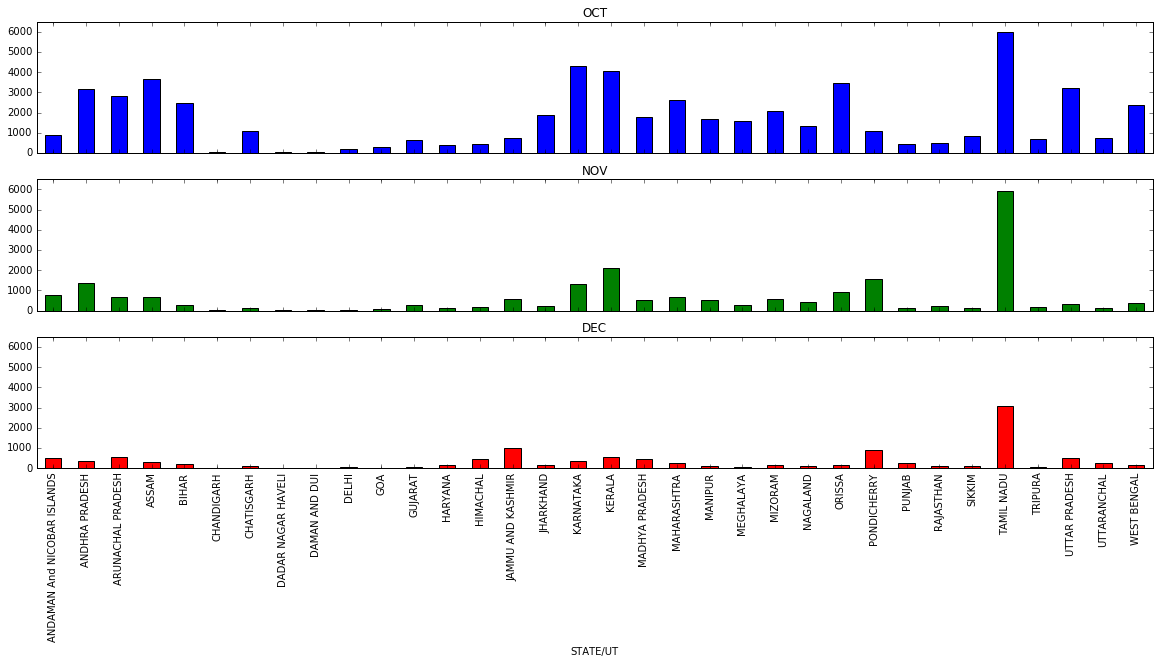

In [116]:
months_q1 = ["JAN","FEB","MAR"]
months_q2 = ["APR","MAY","JUN"]
months_q3 = ["JUL","AUG","SEP"]
months_q4 = ["OCT","NOV","DEC"]
#months = ["MAR","JUN","SEP","DEC"]
ax= data_gb[months_q4].sum().plot(figsize=(20,8),kind='bar',subplots=True,legend=False,ylim=(0,6500))

In [117]:
data_gb_quarter = data_gb.sum()

In [118]:
quarters = {'Q1':months_q1,'Q2':months_q2,'Q3':months_q3,'Q4':months_q4}
for quarter in quarters:
    #print quarters[quarter]
    data_gb_quarter[quarter] = (data_gb_quarter[quarters[quarter]]).mean(axis=1)

In [119]:
data_gb_quarter[['Q1','Q2','Q3','Q4']].head()

,Q1,Q2,Q3,Q4
STATE/UT,,,,
ANDAMAN And NICOBAR ISLANDS,125.300000,864.466667,1197.600000,724.033333
ANDHRA PRADESH,182.233333,1403.066667,4026.266667,1634.000000
ARUNACHAL PRADESH,1664.000000,5689.633333,6894.166667,1364.866667
ASSAM,1126.900000,8822.900000,10584.133333,1555.300000
BIHAR,408.966667,3006.066667,10813.500000,978.500000


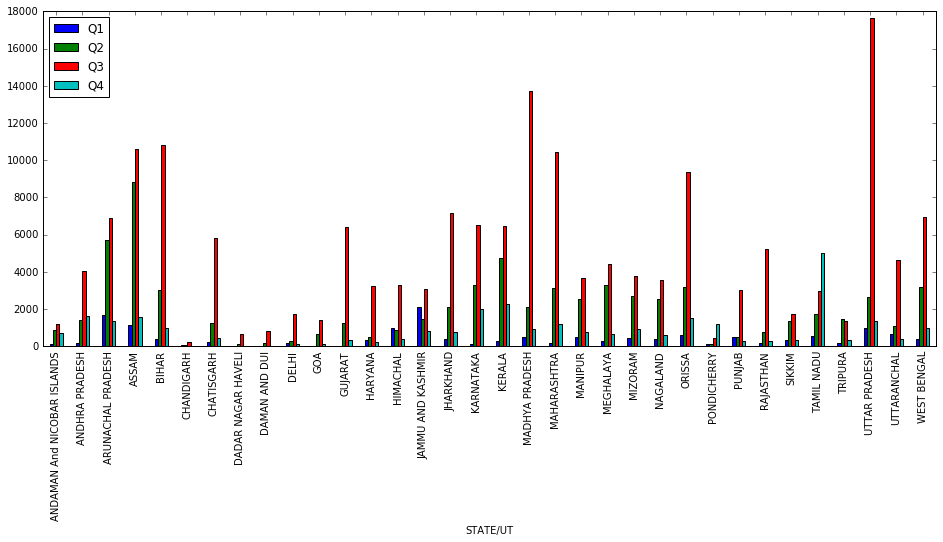

In [120]:
ax = data_gb_quarter[['Q1','Q2','Q3','Q4']].plot(kind='bar',figsize=(16,6))